# 2# algorithm - random sort

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from functools import total_ordering
import bisect
from heapq import merge
from collections import Counter
from tqdm import tqdm

#### Helping Functions

In [2]:
#make random students
#make the students_df
#sort by gpa
def make_random_students(num_students):
    sat = np.random.randint(200, 801, size=num_students) 
    gpa = np.random.randint(0, 101, size = num_students)

    data_dict = {"gpa" : gpa, "sat" : sat}
    students_df = pd.DataFrame.from_dict(data_dict)
    #left out the gpa sort
    return students_df

In [3]:
#makes the df_diamond
def diamond_branch(df):
    df_diamond = df.copy(deep=True)
    in_diamond = [0]*df.shape[0]
    for index, row in df.iterrows():
        sat = row["sat"]
        gpa = row["gpa"]
        if (((sat-5*gpa) < 500) & ((sat+5*gpa) < 1100) & ((sat-5*gpa) > -100) & ((sat+5*gpa) > 500)):
            in_diamond[index] = 1
            
    df_diamond['in_diamond'] = in_diamond #add col
    df_diamond = df_diamond[df_diamond['in_diamond']>0] #leave only thoser that have 1
    df_diamond = df_diamond.drop('in_diamond', axis=1) #erases in_diamond col
    df_diamond = df_diamond.reset_index(drop=True)
    
    n_d = df_diamond.shape[0]
    df_diamond = df_diamond[:n_d - n_d%10]
    
    return df_diamond

In [4]:
def random_sort(df, interactions, num_colors=10):
    nparr = np.array(df)
    n = len(nparr)
    for y in tqdm(range(interactions)):
        i = np.random.randint(0, n-1)
        if not((nparr[i,0] < nparr[i+1,0]) and (nparr[i,1] < nparr[i+1,1])):
            nparr[i+1], nparr[i] = nparr[i].copy(), nparr[i+1].copy()
    df_sorted = pd.DataFrame(nparr, columns = ['gpa','sat','color'])
    df_sorted['color'] = np.array([[i]*int(n/num_colors) for i in range(num_colors)]).flatten()           
    return df_sorted    

## Part 1 - Random Students and stacks by percentage analysis

In [5]:
num_students = 500
students_df = make_random_students(num_students)
students_df

gpa  sat
0      0  688
1     43  486
2     53  446
3     17  437
4     72  399
..   ...  ...
495   98  448
496   55  258
497   41  634
498   46  703
499   85  556

[500 rows x 2 columns]

In [20]:
cycles = [1,1.05,1.1,1.15,1.2,1.25,1.3,1.35,1.4,1.45,1.5,1.55,1.6,1.65,1.7,1.75,1.8,1.85,1.9,1.95,2,2.05,2.1,2.15,2.2,2.25,2.3,2.35,2.4,2.45,2.5,2.55,2.6,2.65,2.7,2.75,2.8,2.85,2.9,2.95,3,3.05,3.1,3.15,3.2,3.25,3.3,3.35,3.4,3.45,3.5]

100%|██████████████████████████████████████████| 500/500 [00:00<00:00, 87116.35it/s]


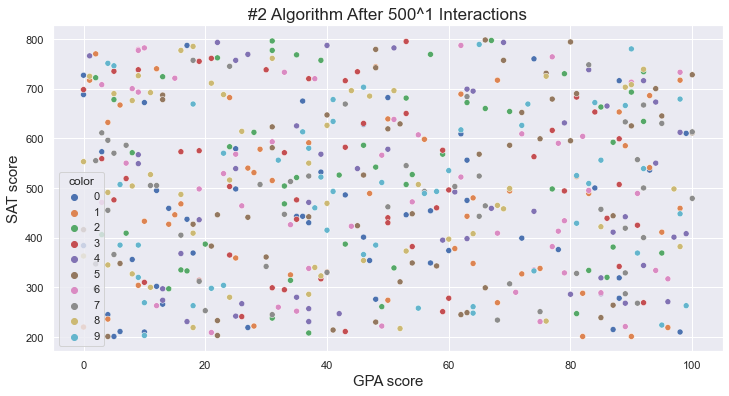

100%|█████████████████████████████████████████| 651/651 [00:00<00:00, 326496.70it/s]


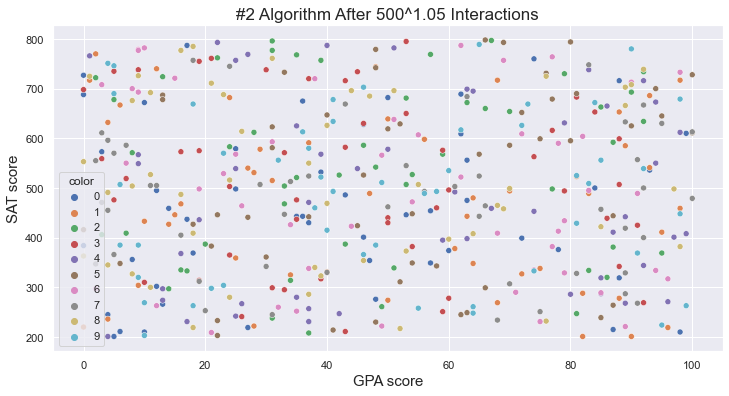

100%|█████████████████████████████████████████| 889/889 [00:00<00:00, 170839.19it/s]


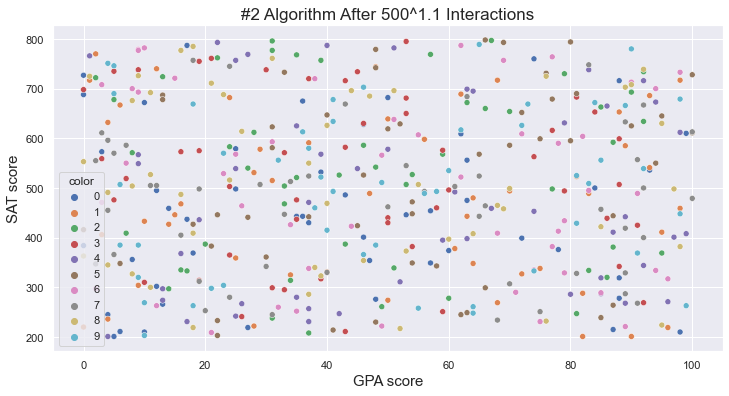

100%|███████████████████████████████████████| 1213/1213 [00:00<00:00, 216737.27it/s]


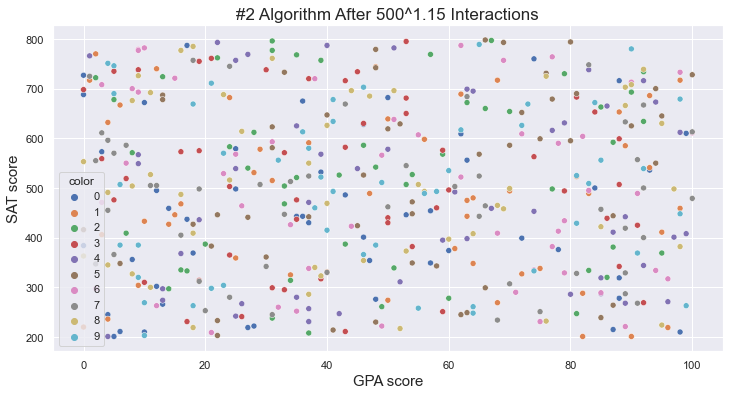

100%|███████████████████████████████████████| 1655/1655 [00:00<00:00, 275886.22it/s]


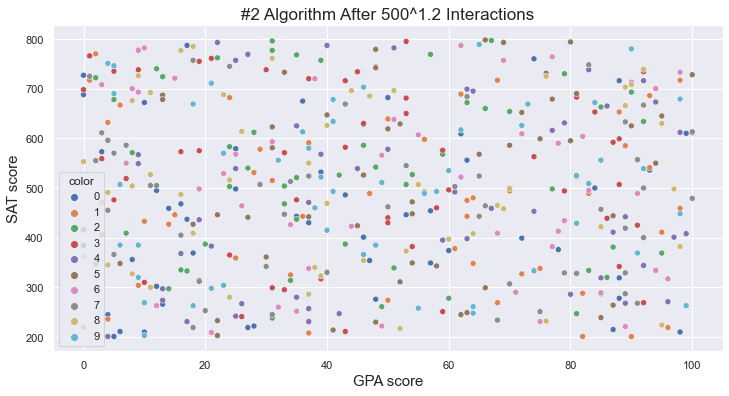

100%|███████████████████████████████████████| 2258/2258 [00:00<00:00, 269706.35it/s]


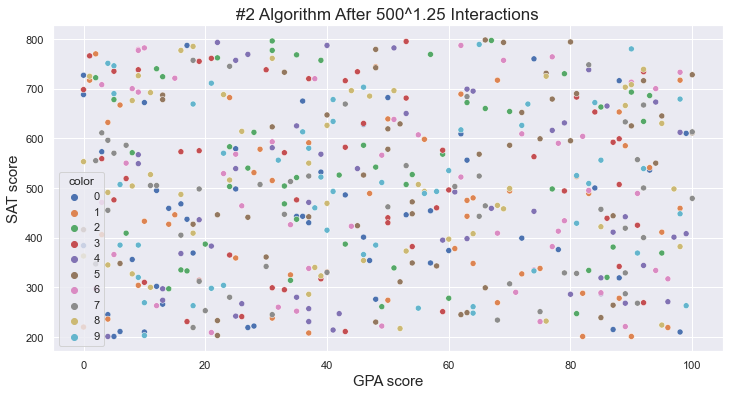

100%|███████████████████████████████████████| 3081/3081 [00:00<00:00, 274372.08it/s]


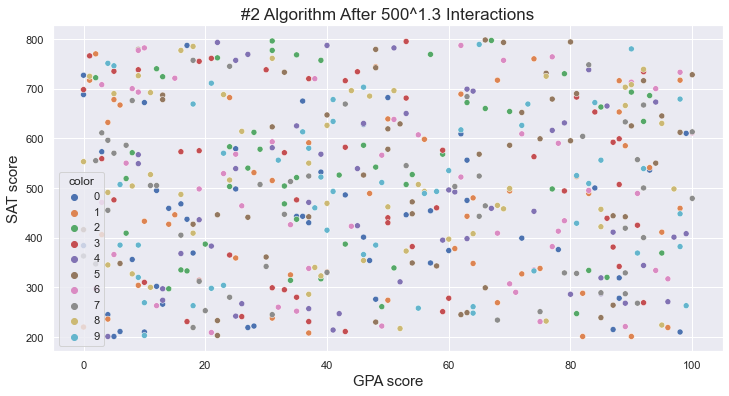

100%|███████████████████████████████████████| 4204/4204 [00:00<00:00, 247225.36it/s]


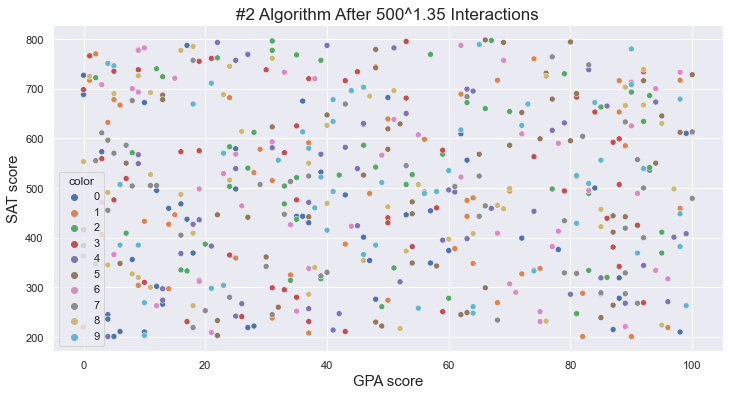

100%|███████████████████████████████████████| 5737/5737 [00:00<00:00, 243697.81it/s]


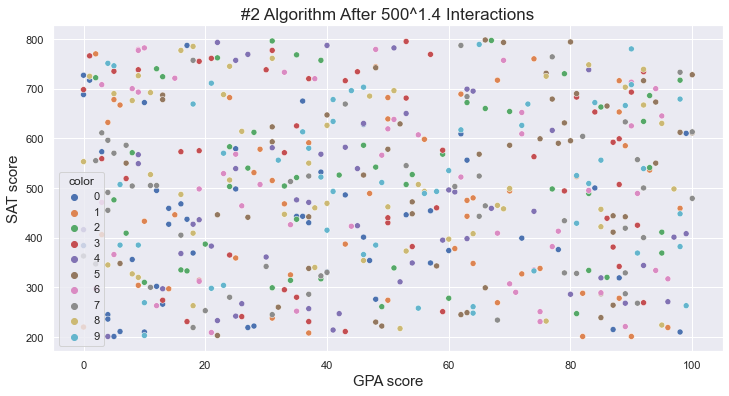

100%|███████████████████████████████████████| 7827/7827 [00:00<00:00, 261863.80it/s]


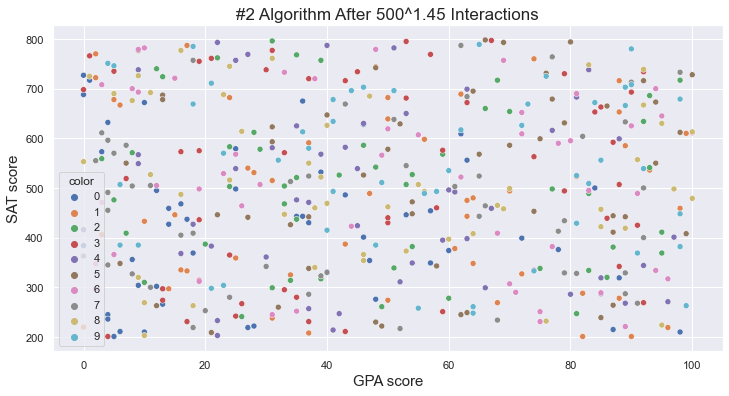

100%|█████████████████████████████████████| 10680/10680 [00:00<00:00, 223149.07it/s]


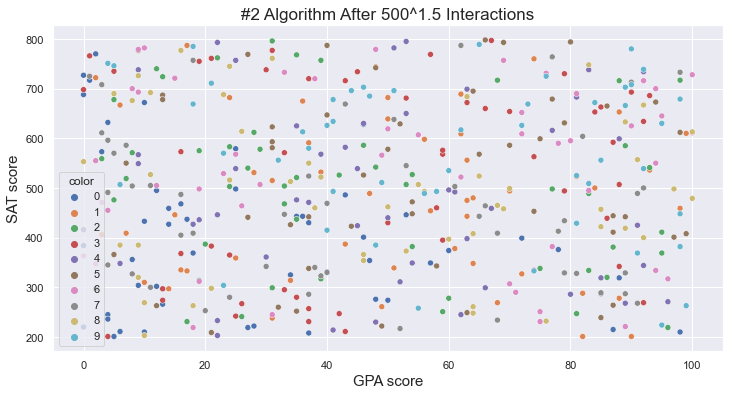

100%|█████████████████████████████████████| 14572/14572 [00:00<00:00, 303164.10it/s]


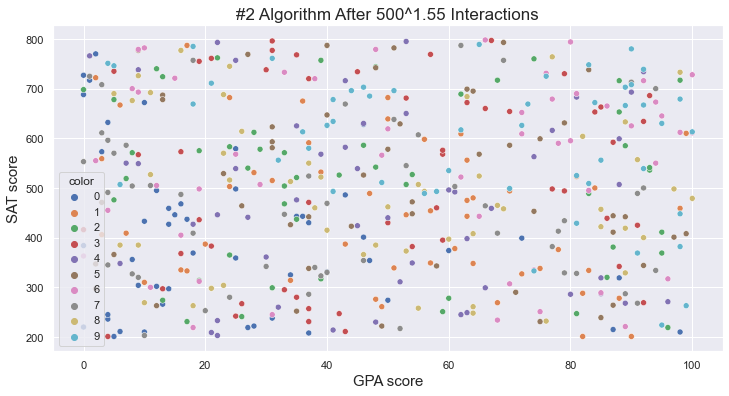

100%|█████████████████████████████████████| 19883/19883 [00:00<00:00, 281601.19it/s]


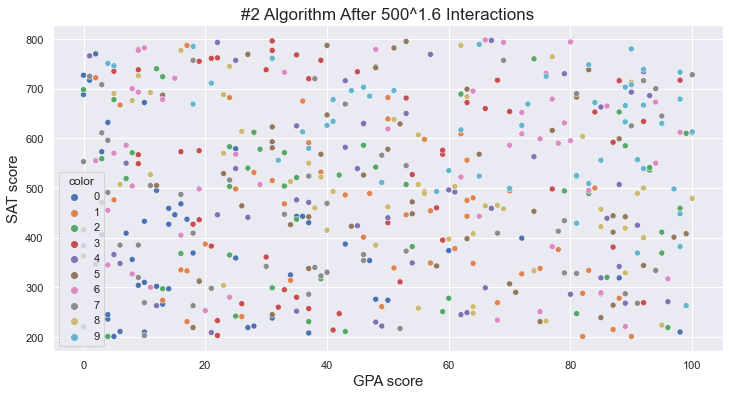

100%|█████████████████████████████████████| 27128/27128 [00:00<00:00, 277470.30it/s]


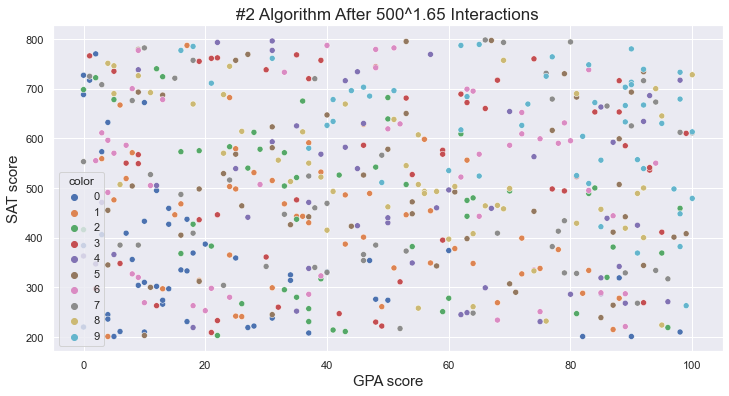

100%|█████████████████████████████████████| 37015/37015 [00:00<00:00, 277669.37it/s]


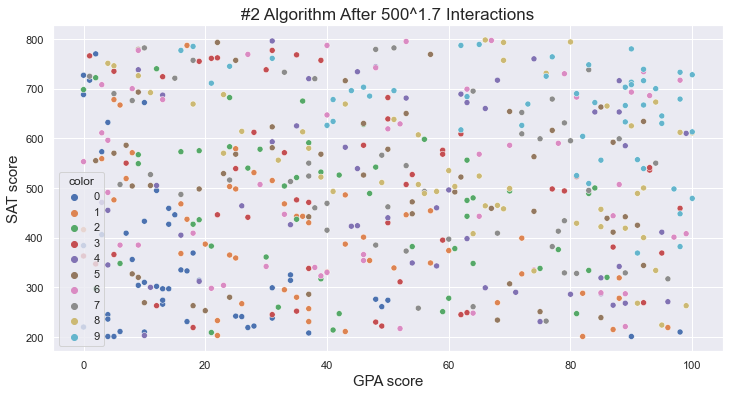

100%|█████████████████████████████████████| 50504/50504 [00:00<00:00, 175514.04it/s]


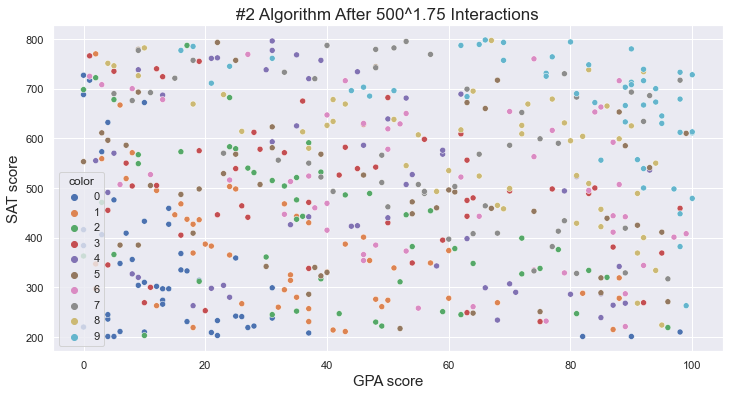

100%|█████████████████████████████████████| 68909/68909 [00:00<00:00, 148728.20it/s]


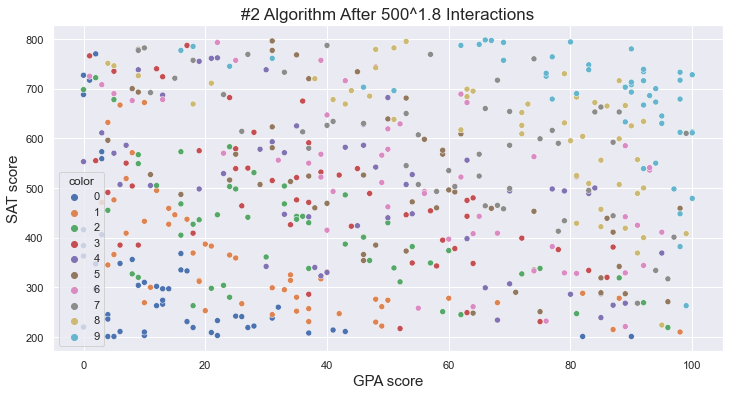

100%|█████████████████████████████████████| 94020/94020 [00:00<00:00, 109123.09it/s]


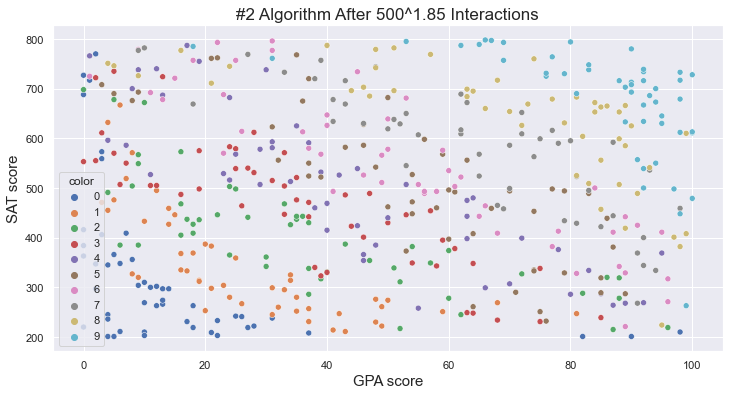

100%|███████████████████████████████████| 128284/128284 [00:01<00:00, 119845.32it/s]


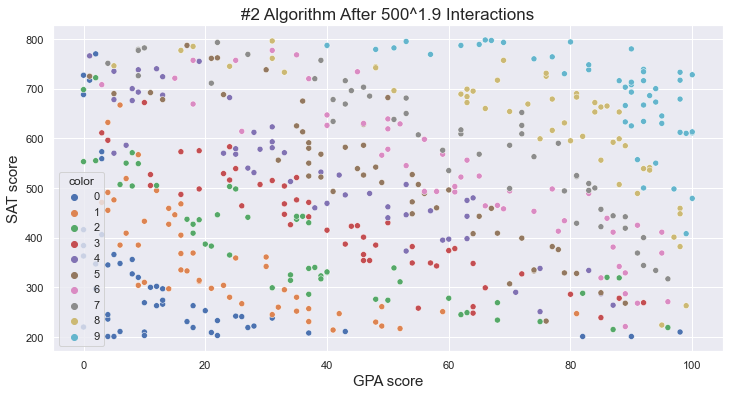

100%|███████████████████████████████████| 175033/175033 [00:00<00:00, 220973.51it/s]


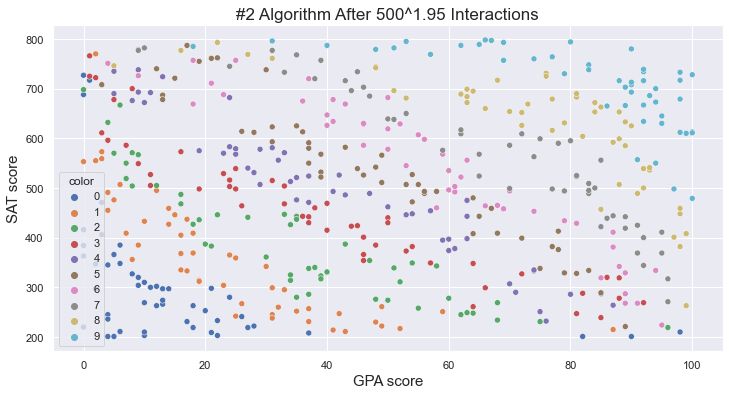

100%|███████████████████████████████████| 238819/238819 [00:01<00:00, 133564.82it/s]


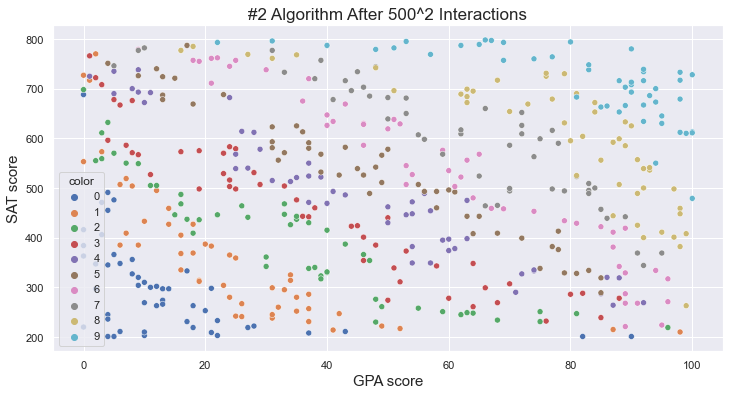

100%|███████████████████████████████████| 325850/325850 [00:01<00:00, 206069.66it/s]


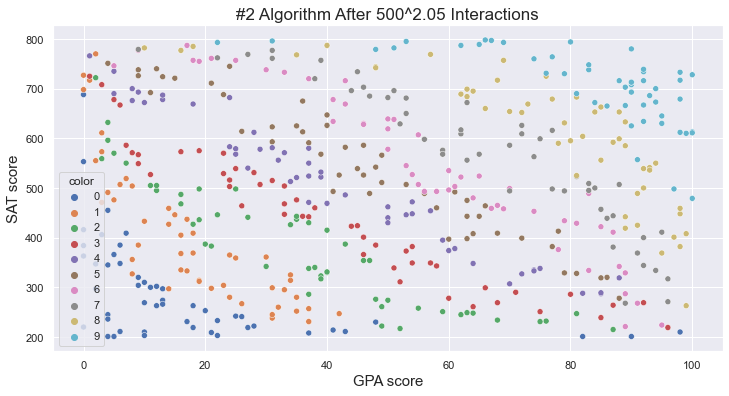

100%|███████████████████████████████████| 444597/444597 [00:02<00:00, 190345.28it/s]


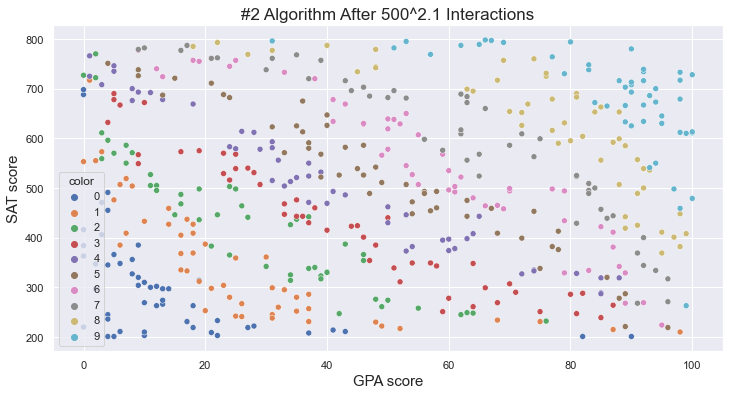

100%|███████████████████████████████████| 606618/606618 [00:03<00:00, 169125.62it/s]


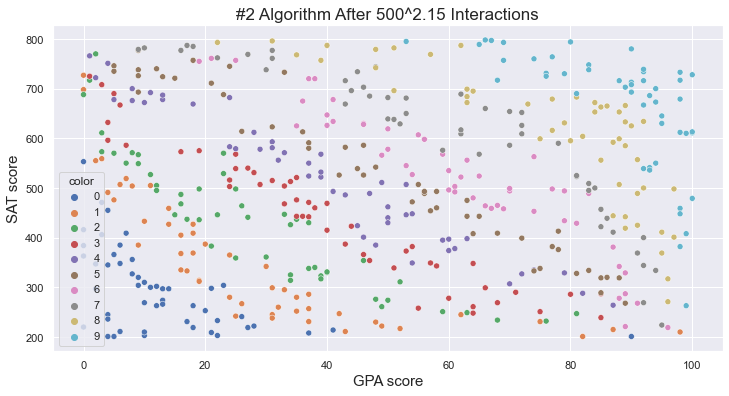

100%|███████████████████████████████████| 827683/827683 [00:03<00:00, 220504.83it/s]


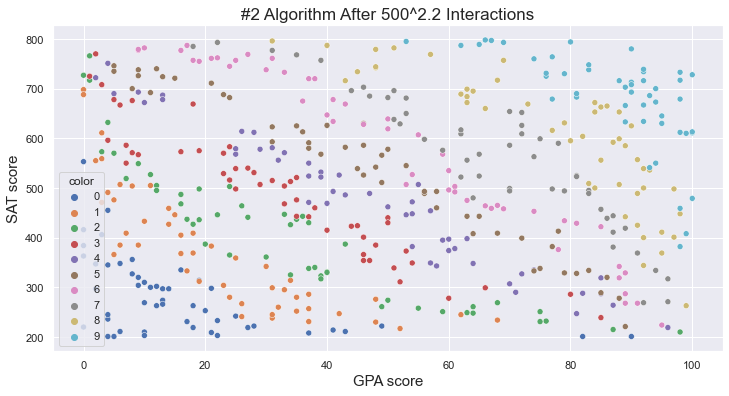

100%|█████████████████████████████████| 1129308/1129308 [00:04<00:00, 240326.85it/s]


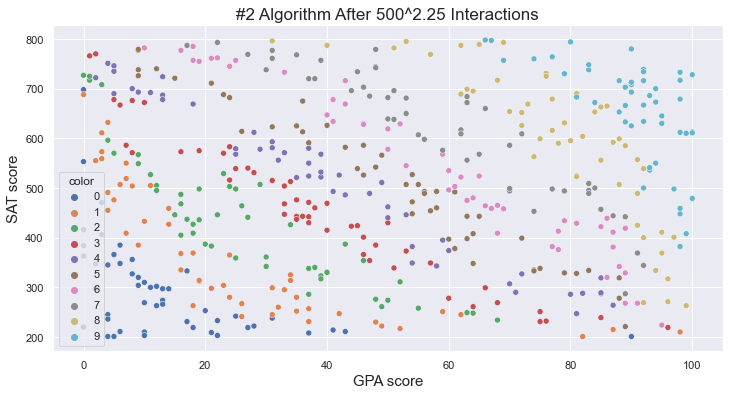

100%|█████████████████████████████████| 1540852/1540852 [00:07<00:00, 209298.52it/s]


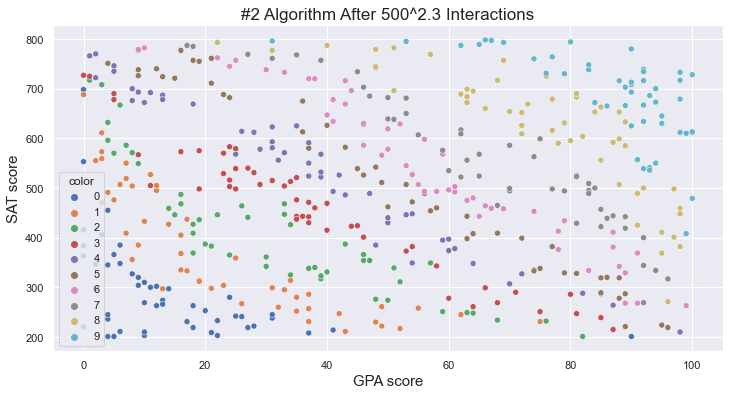

100%|█████████████████████████████████| 2102372/2102372 [00:09<00:00, 233553.08it/s]


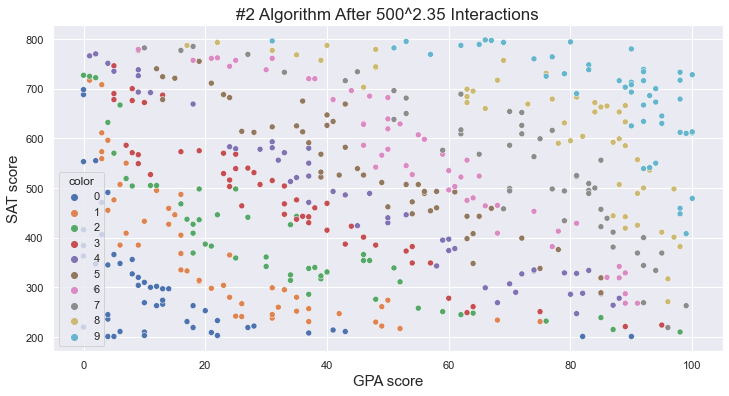

100%|█████████████████████████████████| 2868521/2868521 [00:13<00:00, 216928.67it/s]


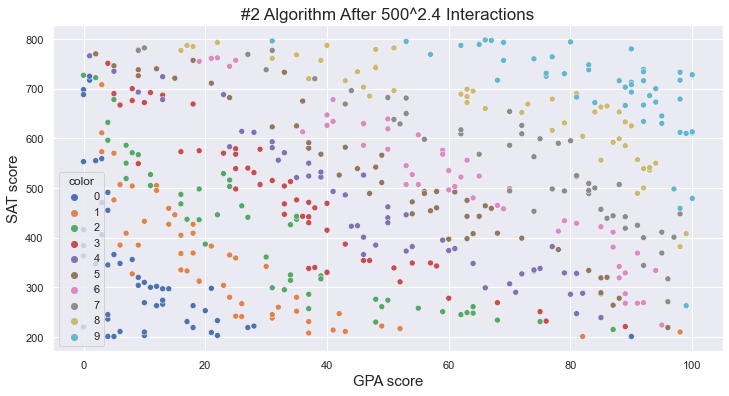

100%|█████████████████████████████████| 3913871/3913871 [00:19<00:00, 202733.84it/s]


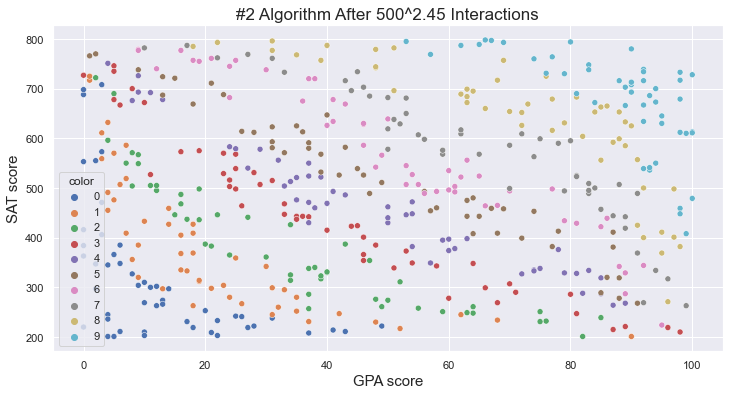

100%|█████████████████████████████████| 5340169/5340169 [00:22<00:00, 241090.10it/s]


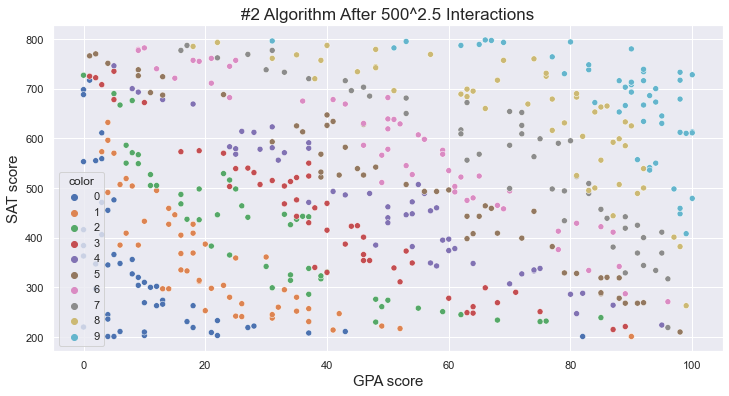

100%|█████████████████████████████████| 7286241/7286241 [00:32<00:00, 224265.74it/s]


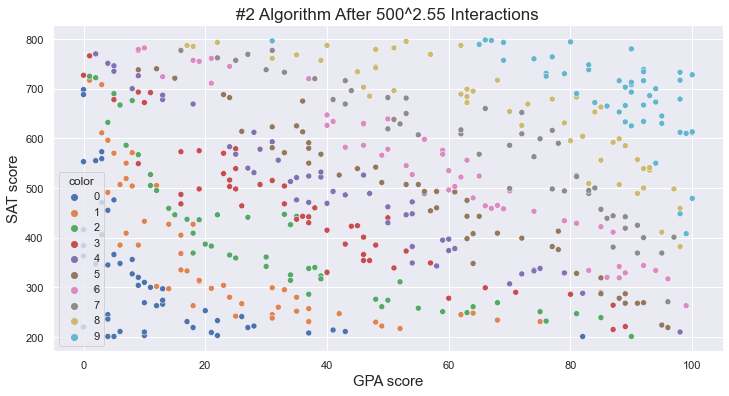

100%|█████████████████████████████████| 9941503/9941503 [00:53<00:00, 184733.51it/s]


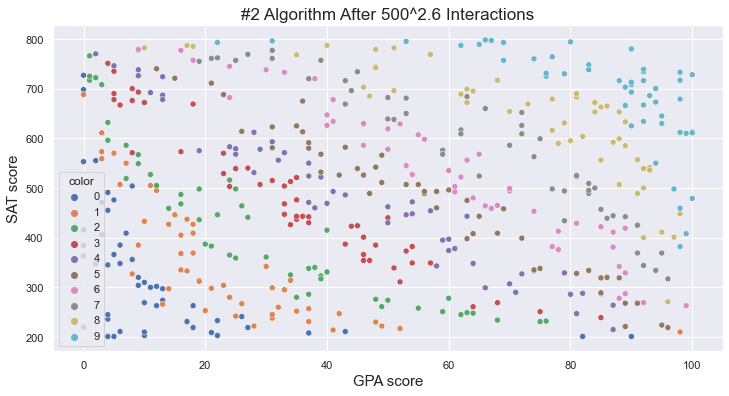

100%|███████████████████████████████| 13564399/13564399 [00:52<00:00, 257882.09it/s]


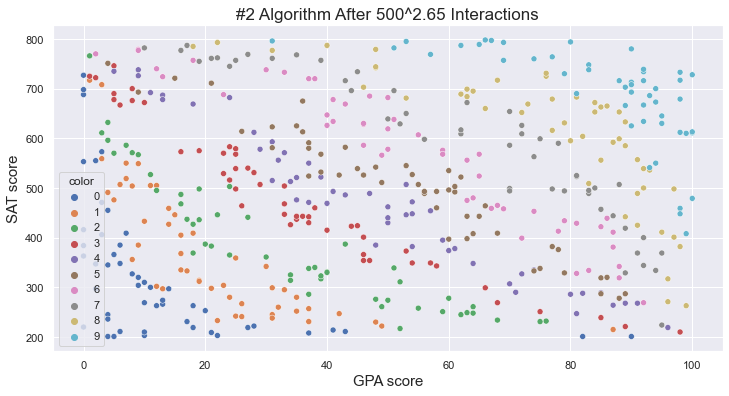

100%|███████████████████████████████| 18507556/18507556 [01:12<00:00, 256680.43it/s]


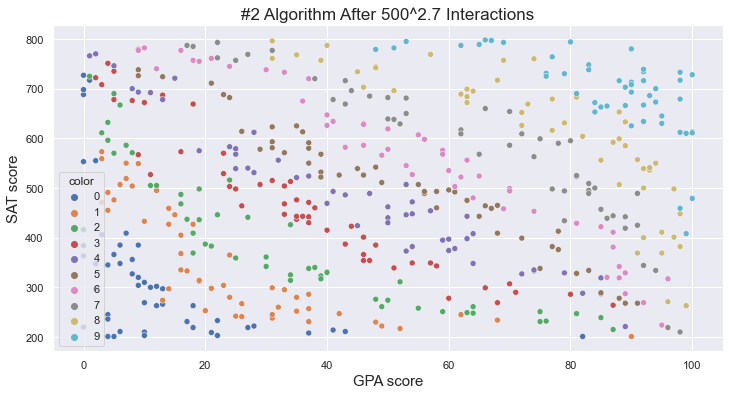

100%|███████████████████████████████| 25252104/25252104 [01:41<00:00, 248826.43it/s]


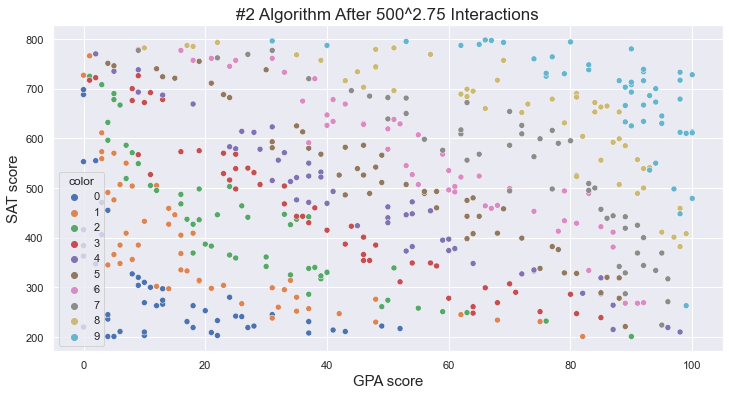

100%|███████████████████████████████| 34454510/34454510 [02:15<00:00, 254724.04it/s]


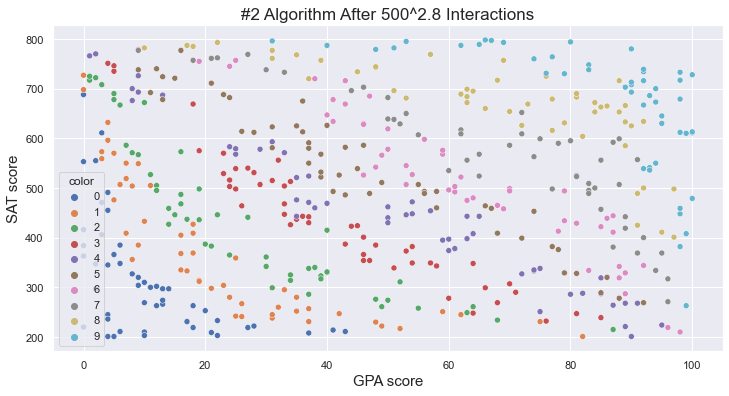

100%|███████████████████████████████| 47010468/47010468 [02:55<00:00, 267222.00it/s]


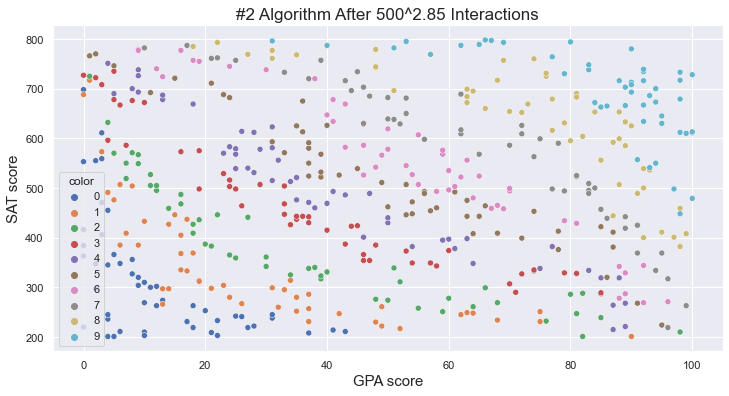

100%|███████████████████████████████| 64142086/64142086 [05:41<00:00, 187589.89it/s]


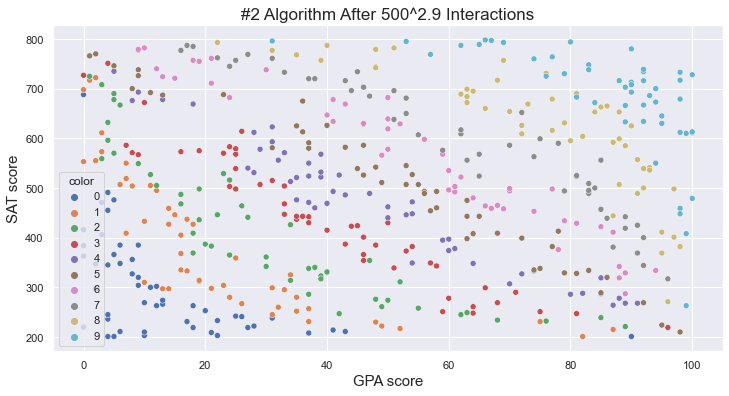

100%|███████████████████████████████| 87516830/87516830 [07:05<00:00, 205825.97it/s]


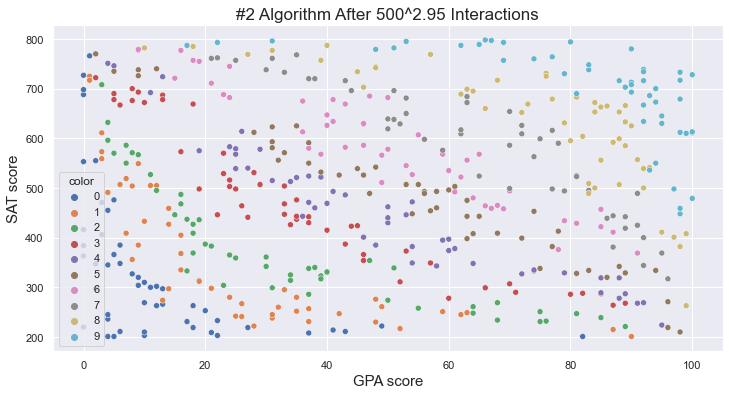

100%|█████████████████████████████| 119409830/119409830 [11:55<00:00, 166816.26it/s]


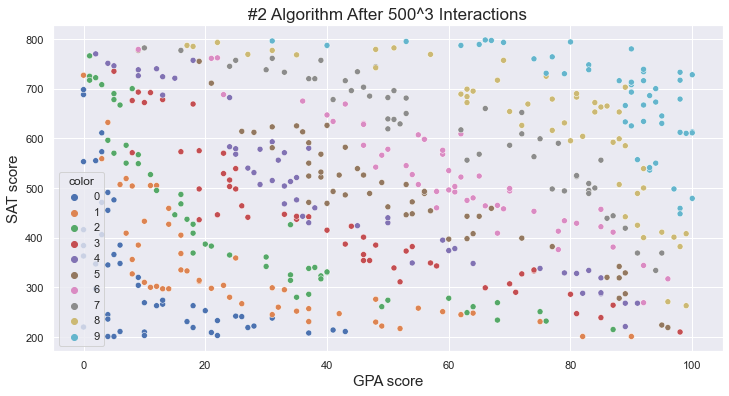

100%|█████████████████████████████| 162925319/162925319 [17:58<00:00, 151120.74it/s]


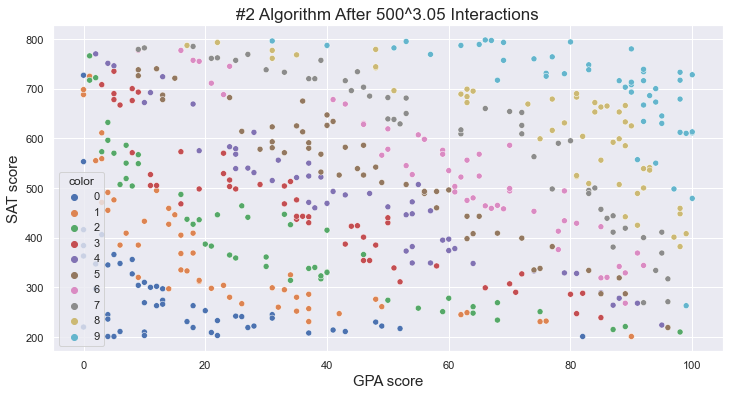

 74%|████████████████████       | 164676089/222298780 [3:00:18<04:39, 206201.55it/s]

In [ ]:
students_df_sort = students_df.copy()
students_df_sort['color'] = [0]*students_df_sort.shape[0]
for cycle in cycles:
    if cycle == 1:
        interactions = int(pow(num_students, cycle))
    elif cycle == 'n3logn':
        cycle = '3*log\({}\)'.format(num_students)
        interactions = int(pow(num_students,3)*math.log(num_students)-pow(num_students, 3))
    else:
        interactions = int(pow(num_students, cycle)-pow(num_students, cycle-0.5))
    students_df_sort = random_sort(students_df_sort, interactions, num_colors=10)
    
    sns.scatterplot(data=students_df_sort, x="gpa", y="sat", hue="color", palette='deep', markers = True, ci= None)
    sns.set(rc = {'figure.figsize':(12,6)})
    plt.title('#2 Algorithm After {}^{} Interactions'.format(num_students, cycle), size = 17)
    plt.ylabel('SAT score', size = 15)
    plt.xlabel('GPA score', size = 15)
    plt.savefig('scatterplot500in{}.png'.format(cycle))
    plt.show()


In [16]:
diamond_df = diamond_branch(students_df)
print("Students in the Diamond Shape: {}".format(diamond_df.shape[0]))
diamond_df.head()

Students in the Diamond Shape: 5540


gpa  sat
0   66  235
1   43  549
2   67  433
3   23  468
4   52  383

In [26]:
num_students = diamond_df.shape[0]
students_df_sort = diamond_df.copy()
for cycle in [1,1.3,1.6,1.9,2.2,2.5,2.8,3,'3 * log250',3.3]:
    if cycle == 1:
        interactions = int(pow(num_students, cycle))
    elif cycle == '3 * log250':
        interactions = int(pow(num_students,3)*math.log(num_students)-pow(num_students, 3))
    else:
        interactions = int(pow(num_students, cycle)-pow(num_students, cycle-0.5))
    students_df_sort = random_sort(students_df_sort, interactions, num_colors=10)

    sns.lineplot(data=students_df_sort, x="gpa", y="sat", hue="color", palette='deep', markers = True, ci= None)
    sns.set(rc = {'figure.figsize':(12,6)})
    plt.title('#2 Algorithm After {}^{} Interactions'.format(num_students, cycle), size = 17)
    plt.ylabel('SAT score', size = 15)
    plt.xlabel('GPA score', size = 15)
    plt.show()

100%|███████████████████████████████████| 5540/5540 [00:00<00:00, 282293.73it/s]


ValueError: Shape of passed values is (5540, 2), indices imply (5540, 3)